In [123]:
! pip install scikit-learn
! pip install xgboost

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [124]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
import pickle

## Step 1: Load Data

In [125]:
print("Loading dataset...")
df = pd.read_csv('A:/Data seekho/DSMP/E-commerce churn analysis/ecommerce-churn-prediction/data/fact_customer.csv')
print("Dataset loaded successfully!\n")

Loading dataset...
Dataset loaded successfully!



In [126]:
df.head()

,Unnamed: 0,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,...,dob,email,phone_number,is_churned,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value
0,0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,...,1999-07-13,michealbender@gmail.com,(309)938-3205x8088,1.0,1056.0,8.0,0.0,2021-08-15,30.0,280.82
1,1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,...,1995-01-18,nicholasclark@flowers.net,(363)377-7602,1.0,1494.0,1.0,0.0,2020-01-19,30.0,52.40
2,2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,...,2002-10-11,geraldcastro@mosley.com,661-041-4070x466,0.0,386.0,6.0,1.0,2021-04-06,42.0,165.90
3,3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,...,1992-12-29,vguerrero@green.org,712-518-4596x428,0.0,482.0,3.0,1.0,2022-05-17,28.0,427.81
4,4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,...,1989-08-17,qfloyd@gmail.com,249-201-6223,0.0,1309.0,2.0,1.0,2023-01-28,31.0,321.20


In [127]:
df.columns

Index(['Unnamed: 0', 'invoice_no', 'category', 'item', 'quantity', 'price',
       'location_id', 'customer_id', 'invoice_date', 'payment_id',
       'payment_method', 'card_type', 'Unnamed: 3', 'shopping_mall', 'city',
       'province_state', 'country', 'first_name', 'last_name', 'gender', 'age',
       'dob', 'email', 'phone_number', 'is_churned',
       'days_since_last_purchase', 'tenure', 'discount_used',
       'last_purchase_date', 'purchase_frequency', 'avg_purchase_value'],
      dtype='object')

In [128]:
df.shape

(10000, 31)

## Step 2: Initial Data Exploration

In [129]:
print("Checking for missing values:")
print(df.isnull().sum())

Checking for missing values:
Unnamed: 0                      0
invoice_no                      0
category                        0
item                            0
quantity                        0
price                           0
location_id                     0
customer_id                     0
invoice_date                    0
payment_id                      0
payment_method                  0
card_type                    3980
Unnamed: 3                  10000
shopping_mall                   0
city                            0
province_state                  0
country                         0
first_name                      4
last_name                       4
gender                          4
age                             4
dob                             4
email                           4
phone_number                    4
is_churned                      4
days_since_last_purchase        4
tenure                          4
discount_used                   4
last_purchase_date 

In [130]:
print("Checking for duplicate rows:")
print(df.duplicated().sum())

Checking for duplicate rows:
0


In [131]:
print("Displaying first few rows of the dataset:")
df.head()



Displaying first few rows of the dataset:


,Unnamed: 0,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,...,dob,email,phone_number,is_churned,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value
0,0,100000,Hair Care,Hair Oil,1,17.45,1,398,2023-03-22,2,...,1999-07-13,michealbender@gmail.com,(309)938-3205x8088,1.0,1056.0,8.0,0.0,2021-08-15,30.0,280.82
1,1,100001,Body Care and Hygiene,Deodorant,4,20.81,21,938,2024-04-06,9,...,1995-01-18,nicholasclark@flowers.net,(363)377-7602,1.0,1494.0,1.0,0.0,2020-01-19,30.0,52.40
2,2,100002,Skin Care,Face Wash,4,40.96,17,258,2022-05-31,10,...,2002-10-11,geraldcastro@mosley.com,661-041-4070x466,0.0,386.0,6.0,1.0,2021-04-06,42.0,165.90
3,3,100003,Body Care and Hygiene,Body Lotion,2,27.50,9,892,2021-01-01,10,...,1992-12-29,vguerrero@green.org,712-518-4596x428,0.0,482.0,3.0,1.0,2022-05-17,28.0,427.81
4,4,100004,Oral Care,Toothpaste,1,16.43,55,978,2020-02-10,7,...,1989-08-17,qfloyd@gmail.com,249-201-6223,0.0,1309.0,2.0,1.0,2023-01-28,31.0,321.20


In [132]:
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                10000 non-null  int64  
 1   invoice_no                10000 non-null  int64  
 2   category                  10000 non-null  object 
 3   item                      10000 non-null  object 
 4   quantity                  10000 non-null  int64  
 5   price                     10000 non-null  float64
 6   location_id               10000 non-null  int64  
 7   customer_id               10000 non-null  int64  
 8   invoice_date              10000 non-null  object 
 9   payment_id                10000 non-null  int64  
 10  payment_method            10000 non-null  object 
 11  card_type                 6020 non-null   object 
 12  Unnamed: 3                0 non-null      float64
 13  shopping_mall             10000 non-null  object

In [133]:
print("Summary Statistics:")
df.describe()

Summary Statistics:


,Unnamed: 0,invoice_no,quantity,price,location_id,customer_id,payment_id,Unnamed: 3,age,is_churned,days_since_last_purchase,tenure,discount_used,purchase_frequency,avg_purchase_value
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,0.0,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000,9996.000000
mean,4999.50000,104999.50000,2.490400,31.062060,30.655300,503.279500,5.491200,NaN,44.094038,0.490496,911.181673,5.610444,0.505702,25.318928,249.147564
std,2886.89568,2886.89568,1.121443,24.461435,17.300682,288.437875,2.863345,NaN,15.548249,0.499935,523.872634,2.908941,0.499992,14.582292,142.459307
min,0.00000,100000.00000,1.000000,2.010000,1.000000,1.000000,1.000000,NaN,18.000000,0.000000,1.000000,1.000000,0.000000,1.000000,5.010000
25%,2499.75000,102499.75000,1.000000,12.980000,16.000000,251.000000,3.000000,NaN,30.000000,0.000000,484.000000,3.000000,0.000000,12.000000,125.910000
50%,4999.50000,104999.50000,2.000000,22.815000,31.000000,502.000000,5.000000,NaN,44.000000,0.000000,930.000000,6.000000,1.000000,25.000000,253.780000
75%,7499.25000,107499.25000,3.000000,42.972500,46.000000,757.000000,8.000000,NaN,57.000000,1.000000,1362.000000,8.000000,1.000000,38.000000,372.980000
max,9999.00000,109999.00000,4.000000,100.000000,60.000000,1000.000000,10.000000,NaN,70.000000,1.000000,1824.000000,10.000000,1.000000,50.000000,499.910000


In [134]:
print("Checking data types:")
df.dtypes

Checking data types:


Unnamed: 0                    int64
invoice_no                    int64
category                     object
item                         object
quantity                      int64
price                       float64
location_id                   int64
customer_id                   int64
invoice_date                 object
payment_id                    int64
payment_method               object
card_type                    object
Unnamed: 3                  float64
shopping_mall                object
city                         object
province_state               object
country                      object
first_name                   object
last_name                    object
gender                       object
age                         float64
dob                          object
email                        object
phone_number                 object
is_churned                  float64
days_since_last_purchase    float64
tenure                      float64
discount_used               

In [135]:
print("Checking unique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()} unique values")

Checking unique values in categorical columns:
category: 4 unique values
item: 12 unique values
invoice_date: 1866 unique values
payment_method: 10 unique values
card_type: 4 unique values
shopping_mall: 60 unique values
city: 50 unique values
province_state: 31 unique values
country: 4 unique values
first_name: 346 unique values
last_name: 503 unique values
gender: 3 unique values
dob: 974 unique values
email: 999 unique values
phone_number: 999 unique values
last_purchase_date: 782 unique values


## Step 3: Data Preprocessing

In [136]:
print("Cleaning and processing data...")

# Drop unnecessary columns
df.drop(columns=['Unnamed: 3', 'Unnamed: 0','email', 'phone_number'], inplace=True, errors='ignore')

Cleaning and processing data...


In [137]:
# Handle missing values
print("Filling missing values...")
df.fillna(method='ffill', inplace=True)



Filling missing values...


C:\Users\PMLS\AppData\Local\Temp\ipykernel_11560\773471625.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [138]:
df.isnull().sum()

invoice_no                  0
category                    0
item                        0
quantity                    0
price                       0
location_id                 0
customer_id                 0
invoice_date                0
payment_id                  0
payment_method              0
card_type                   0
shopping_mall               0
city                        0
province_state              0
country                     0
first_name                  0
last_name                   0
gender                      0
age                         0
dob                         0
is_churned                  0
days_since_last_purchase    0
tenure                      0
discount_used               0
last_purchase_date          0
purchase_frequency          0
avg_purchase_value          0
dtype: int64

In [139]:
df.dtypes

invoice_no                    int64
category                     object
item                         object
quantity                      int64
price                       float64
location_id                   int64
customer_id                   int64
invoice_date                 object
payment_id                    int64
payment_method               object
card_type                    object
shopping_mall                object
city                         object
province_state               object
country                      object
first_name                   object
last_name                    object
gender                       object
age                         float64
dob                          object
is_churned                  float64
days_since_last_purchase    float64
tenure                      float64
discount_used               float64
last_purchase_date           object
purchase_frequency          float64
avg_purchase_value          float64
dtype: object

In [140]:
# Convert dates to datetime format
print("Converting date columns...")
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])
df['dob'] = pd.to_datetime(df['dob'])



Converting date columns...


In [141]:
df['invoice_date']

0      2023-03-22
1      2024-04-06
2      2022-05-31
3      2021-01-01
4      2020-02-10
          ...    
9995   2020-05-07
9996   2021-09-22
9997   2021-02-25
9998   2023-06-24
9999   2025-02-12
Name: invoice_date, Length: 10000, dtype: datetime64[ns]

In [142]:
df['last_purchase_date']

0      2021-08-15
1      2020-01-19
2      2021-04-06
3      2022-05-17
4      2023-01-28
          ...    
9995   2024-03-29
9996   2024-06-26
9997   2023-10-26
9998   2020-09-30
9999   2023-07-27
Name: last_purchase_date, Length: 10000, dtype: datetime64[ns]

In [143]:
df['dob']

0      1999-07-13
1      1995-01-18
2      2002-10-11
3      1992-12-29
4      1989-08-17
          ...    
9995   1991-12-22
9996   1968-09-08
9997   1960-01-24
9998   1976-12-17
9999   1979-01-18
Name: dob, Length: 10000, dtype: datetime64[ns]

In [146]:
df['invoice_date'].max().dt.days

AttributeError: 'Timestamp' object has no attribute 'dt'

In [ ]:

# Feature Engineering
print("Performing feature engineering...")
df['recency'] = (df['invoice_date'].max() - df['last_purchase_date']).dt.days
df['purchase_per_tenure'] = df['purchase_frequency'] / (df['tenure'] + 1)
df['discount_ratio'] = df['discount_used'] / (df['price'] + 1)


Performing feature engineering...


In [ ]:
df[['recency', 'purchase_per_tenure', 'discount_ratio']].head()

,recency,purchase_per_tenure,discount_ratio
0,1279,3.333333,0.000000
1,1853,15.000000,0.000000
2,1410,6.000000,0.023832
3,1004,7.000000,0.035088
4,748,10.333333,0.057372


In [ ]:
df[['category','item', 'payment_method', 'card_type', 'shopping_mall', 'city', 'province_state', 'country', 'gender']]

,category,item,payment_method,card_type,shopping_mall,city,province_state,country,gender
0,Hair Care,Hair Oil,Credit Card - MasterCard,MasterCard,Mall of America,Bloomington,Minnesota,US,Female
1,Body Care and Hygiene,Deodorant,Apple Pay,MasterCard,Fashion Show Mall,Las Vegas,Nevada,US,Male
2,Skin Care,Face Wash,Google Pay,MasterCard,Lakeside Shopping Centre,Thurrock,Essex,UK,Female
3,Body Care and Hygiene,Body Lotion,Google Pay,MasterCard,Bullring & Grand Central,Birmingham,West Midlands,UK,Other
4,Oral Care,Toothpaste,Cash,MasterCard,The Galleria at Fort Lauderdale,Fort Lauderdale,Florida,US,Other
...,...,...,...,...,...,...,...,...,...
9995,Hair Care,Conditioner,PayPal,Visa,Metrocentre,Gateshead,Tyne and Wear,UK,Female
9996,Skin Care,Face Wash,Credit Card - AMEX,AMEX,The Gardens Mall,Palm Beach Gardens,Florida,US,Female
9997,Body Care and Hygiene,Hand Sanitizer,Apple Pay,AMEX,The Shops at La Cantera,San Antonio,Texas,US,Female
9998,Skin Care,Face Wash,Debit Card - MasterCard,MasterCard,Lenox Square,Atlanta,Georgia,US,Male


In [ ]:
# Encode categorical variables
print("Encoding categorical features...")
label_encoders = {}
categorical_cols = ['category','item','location_id', 'payment_method', 'card_type', 'shopping_mall', 'city', 'province_state', 'country', 'gender']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

Encoding categorical features...


In [ ]:
df[['category','item', 'payment_method', 'card_type', 'shopping_mall', 'city', 'province_state', 'country', 'gender']]

,category,item,payment_method,card_type,shopping_mall,city,province_state,country,gender
0,1,4,4,2,17,5,16,3,0
1,0,2,0,2,12,24,17,3,1
2,3,3,8,2,15,47,8,2,0
3,0,0,8,2,7,4,30,2,2
4,2,11,2,2,38,18,9,3,2
...,...,...,...,...,...,...,...,...,...
9995,1,1,9,3,19,21,27,2,0
9996,3,3,3,1,39,36,9,3,0
9997,0,5,0,1,46,40,26,3,0
9998,3,3,6,2,16,1,10,3,1


In [ ]:
df[['quantity', 'price', 'days_since_last_purchase', 'tenure', 'discount_used', 'purchase_frequency', 'avg_purchase_value', 'recency', 'purchase_per_tenure', 'discount_ratio']]

,quantity,price,days_since_last_purchase,tenure,discount_used,purchase_frequency,avg_purchase_value,recency,purchase_per_tenure,discount_ratio
0,1,17.45,1056.0,8.0,0.0,30.0,280.82,1279,3.333333,0.000000
1,4,20.81,1494.0,1.0,0.0,30.0,52.40,1853,15.000000,0.000000
2,4,40.96,386.0,6.0,1.0,42.0,165.90,1410,6.000000,0.023832
3,2,27.50,482.0,3.0,1.0,28.0,427.81,1004,7.000000,0.035088
4,1,16.43,1309.0,2.0,1.0,31.0,321.20,748,10.333333,0.057372
...,...,...,...,...,...,...,...,...,...,...
9995,4,30.30,1819.0,7.0,1.0,22.0,253.78,322,2.750000,0.031949
9996,4,91.11,1010.0,6.0,0.0,24.0,395.23,233,3.428571,0.000000
9997,2,4.13,1447.0,9.0,0.0,16.0,210.32,477,1.600000,0.000000
9998,2,87.97,769.0,10.0,1.0,5.0,104.89,1598,0.454545,0.011240


In [ ]:

# Normalize numerical features
print("Scaling numerical features...")
scaler = StandardScaler()
numerical_cols = ['quantity', 'price', 'days_since_last_purchase', 'tenure', 'discount_used', 'purchase_frequency', 'avg_purchase_value', 'recency', 'purchase_per_tenure', 'discount_ratio']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Scaling numerical features...


In [ ]:
df[['quantity', 'price', 'days_since_last_purchase', 'tenure', 'discount_used', 'purchase_frequency', 'avg_purchase_value', 'recency', 'purchase_per_tenure', 'discount_ratio']]

,quantity,price,days_since_last_purchase,tenure,discount_used,purchase_frequency,avg_purchase_value,recency,purchase_per_tenure,discount_ratio
0,-1.329069,-0.556498,0.276269,0.821407,-1.011870,0.320442,0.222170,0.618873,-0.374158,-0.623628
1,1.346191,-0.419132,1.112218,-1.584991,-1.011870,0.320442,-1.381175,1.703033,2.071564,-0.623628
2,1.346191,0.404655,-1.002465,0.133864,0.988269,1.143267,-0.584486,0.866303,0.184865,-0.115951
3,-0.437316,-0.145627,-0.819244,-0.897449,0.988269,0.183305,1.253934,0.099458,0.394498,0.123815
4,-1.329069,-0.598198,0.759135,-1.241220,0.988269,0.389011,0.505608,-0.384071,1.093276,0.598525
...,...,...,...,...,...,...,...,...,...,...
9995,1.346191,-0.031155,1.732500,0.477636,0.988269,-0.228108,0.032368,-1.188691,-0.496444,0.056951
9996,1.346191,2.454923,0.188476,0.133864,-1.011870,-0.090970,1.025246,-1.356793,-0.354193,-0.623628
9997,-0.437316,-1.101056,1.022516,1.165178,-1.011870,-0.639520,-0.272690,-0.895930,-0.737522,-0.623628
9998,-0.437316,2.326551,-0.271487,1.508949,0.988269,-1.393776,-1.012733,1.221394,-0.977647,-0.384198


In [ ]:
df.describe()

,invoice_no,category,item,quantity,price,location_id,customer_id,invoice_date,payment_id,payment_method,...,is_churned,days_since_last_purchase,tenure,discount_used,last_purchase_date,purchase_frequency,avg_purchase_value,recency,purchase_per_tenure,discount_ratio
count,10000.00000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000,10000.000000,10000.000000,...,10000.000000,1.000000e+04,1.000000e+04,1.000000e+04,10000,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04,1.000000e+04
mean,104999.50000,1.586700,5.498300,-1.392664e-16,2.629008e-17,29.481800,503.279500,2022-07-28 14:26:44.160000256,5.491200,4.462700,...,0.490600,-3.623768e-17,6.021850e-17,-4.316547e-17,2022-07-08 15:46:04.799999744,7.105427e-17,-5.542233e-17,6.892265e-17,6.181722e-17,6.643575e-17
min,100000.00000,0.000000,0.000000,-1.329069e+00,-1.187727e+00,0.000000,1.000000,2020-01-01 00:00:00,1.000000,0.000000,...,0.000000,-1.737261e+00,-1.584991e+00,-1.011870e+00,2020-01-01 00:00:00,-1.668051e+00,-1.713819e+00,-1.793102e+00,-1.051972e+00,-6.236284e-01
25%,102499.75000,0.000000,3.000000,-1.329069e+00,-7.392438e-01,14.000000,251.000000,2021-04-24 00:00:00,3.000000,2.000000,...,0.000000,-8.154266e-01,-8.974490e-01,-1.011870e+00,2021-04-09 00:00:00,-9.137949e-01,-8.651875e-01,-8.336005e-01,-6.536687e-01,-6.236284e-01
50%,104999.50000,2.000000,5.000000,-4.373157e-01,-3.371622e-01,30.000000,502.000000,2022-07-27 00:00:00,5.000000,4.000000,...,0.000000,3.579083e-02,1.338645e-01,9.882688e-01,2022-07-30 00:00:00,-2.240140e-02,3.236819e-02,-4.031227e-02,-2.809872e-01,-4.050553e-01
75%,107499.25000,3.000000,8.000000,4.544374e-01,4.869312e-01,45.000000,757.000000,2023-11-03 00:00:00,8.000000,7.000000,...,1.000000,8.602884e-01,8.214068e-01,9.882688e-01,2023-09-23 00:00:00,8.689921e-01,8.690667e-01,8.606366e-01,2.687179e-01,2.832311e-01
max,109999.00000,3.000000,11.000000,1.346191e+00,2.818370e+00,59.000000,1000.000000,2025-02-14 00:00:00,10.000000,9.000000,...,1.000000,1.742043e+00,1.508949e+00,9.882688e-01,2025-02-12 00:00:00,1.691817e+00,1.760024e+00,1.737031e+00,4.167898e+00,6.453490e+00
std,2886.89568,1.191648,3.448244,1.000050e+00,1.000050e+00,17.375962,288.437875,NaN,2.863345,2.873714,...,0.499937,1.000050e+00,1.000050e+00,1.000050e+00,NaN,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00,1.000050e+00


## Step 4: Prepare Data for Model Training

In [ ]:
X = df.drop(columns=['is_churned', 'invoice_no', 'customer_id','location_id', 'payment_id',
                     'first_name', 'last_name', 'dob', 'invoice_date', 'last_purchase_date', 
                     ], errors='ignore')

In [ ]:
X

,category,item,quantity,price,payment_method,card_type,shopping_mall,city,province_state,country,gender,age,days_since_last_purchase,tenure,discount_used,purchase_frequency,avg_purchase_value,recency,purchase_per_tenure,discount_ratio
0,1,4,-1.329069,-0.556498,4,2,17,5,16,3,0,25.0,0.276269,0.821407,-1.011870,0.320442,0.222170,0.618873,-0.374158,-0.623628
1,0,2,1.346191,-0.419132,0,2,12,24,17,3,1,30.0,1.112218,-1.584991,-1.011870,0.320442,-1.381175,1.703033,2.071564,-0.623628
2,3,3,1.346191,0.404655,8,2,15,47,8,2,0,22.0,-1.002465,0.133864,0.988269,1.143267,-0.584486,0.866303,0.184865,-0.115951
3,0,0,-0.437316,-0.145627,8,2,7,4,30,2,2,32.0,-0.819244,-0.897449,0.988269,0.183305,1.253934,0.099458,0.394498,0.123815
4,2,11,-1.329069,-0.598198,2,2,38,18,9,3,2,35.0,0.759135,-1.241220,0.988269,0.389011,0.505608,-0.384071,1.093276,0.598525
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1,1,1.346191,-0.031155,9,3,19,21,27,2,0,33.0,1.732500,0.477636,0.988269,-0.228108,0.032368,-1.188691,-0.496444,0.056951
9996,3,3,1.346191,2.454923,3,1,39,36,9,3,0,56.0,0.188476,0.133864,-1.011870,-0.090970,1.025246,-1.356793,-0.354193,-0.623628
9997,0,5,-0.437316,-1.101056,0,1,46,40,26,3,0,65.0,1.022516,1.165178,-1.011870,-0.639520,-0.272690,-0.895930,-0.737522,-0.623628
9998,3,3,-0.437316,2.326551,6,2,16,1,10,3,1,48.0,-0.271487,1.508949,0.988269,-1.393776,-1.012733,1.221394,-0.977647,-0.384198


In [ ]:
print("Preparing training and testing datasets...")
y = df['is_churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Preparing training and testing datasets...


In [ ]:
print(X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(8000, 20) (2000, 20)
(8000,) (2000,)


In [ ]:
X_train

,category,item,quantity,price,payment_method,card_type,shopping_mall,city,province_state,country,gender,age,days_since_last_purchase,tenure,discount_used,purchase_frequency,avg_purchase_value,recency,purchase_per_tenure,discount_ratio
9254,2,11,-0.437316,-0.757232,6,2,40,27,4,3,0,57.0,1.316434,0.821407,-1.011870,-1.530913,0.304646,-0.221635,-1.003058,-0.623628
1561,1,4,-0.437316,-0.125594,6,2,8,7,15,3,2,18.0,1.234366,-0.553678,-1.011870,-0.913795,-0.487269,0.135344,-0.569815,-0.623628
1670,3,10,-0.437316,0.463117,3,1,40,27,4,3,1,50.0,-0.244767,0.477636,-1.011870,-0.913795,-1.200850,1.102401,-0.758485,-0.623628
6087,0,0,-1.329069,-0.875383,8,3,24,1,10,3,0,34.0,-0.824969,-1.584991,0.988269,0.183305,1.522913,-0.718385,1.861931,1.376571
6669,2,8,-0.437316,-1.022152,4,2,40,27,4,3,1,35.0,0.577822,1.165178,0.988269,-1.462345,1.139449,0.671758,-0.989082,2.393670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2,8,1.346191,-0.576939,6,2,32,19,26,3,0,53.0,-1.221950,-0.209907,-1.011870,-1.119501,0.196409,-1.749660,-0.758485,-0.623628
5191,3,7,-1.329069,2.078393,1,0,57,41,4,3,0,20.0,-1.231493,0.821407,0.988269,-0.845226,-0.500466,-0.059200,-0.770132,-0.366667
5390,1,4,-0.437316,0.526076,4,2,36,34,9,3,2,29.0,0.877465,-0.553678,0.988269,-0.776657,-1.336813,-0.484176,-0.485962,-0.149510
860,0,0,-1.329069,-0.947746,6,2,6,32,20,3,1,36.0,-0.282939,0.821407,-1.011870,0.594717,-0.059374,0.758642,-0.280987,-0.623628


## Step 5: Train ML Models

### Predictive ML Model

In [ ]:
# Logistic Regression
print("Training Logistic Regression Model...")
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

Training Logistic Regression Model...


C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Dicision Tree
print("Training Decision Tree Model...")
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train, y_train)

Training Decision Tree Model...


DecisionTreeClassifier()

In [ ]:
# Random Forest
print("Training Random Forest Model...")
rfc_model=RandomForestClassifier()
rfc_model.fit(X_train,y_train)

Training Random Forest Model...


RandomForestClassifier()

In [ ]:
# XGboost
print("Training XGboost Model...")
xgb_model =XGBClassifier()
xgb_model.fit(X_train, y_train)

Training XGboost Model...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

### Customer Segmentation

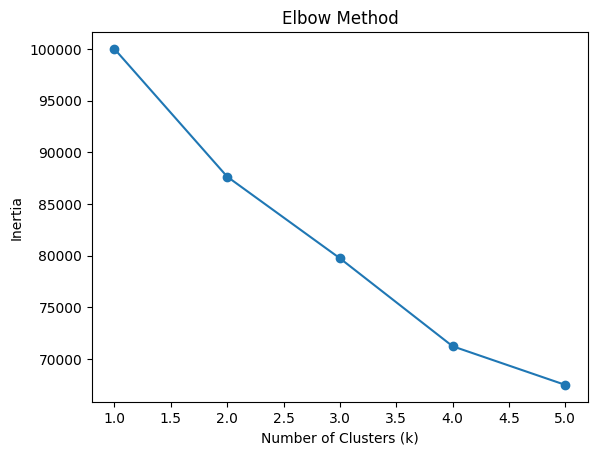

In [ ]:
# K means

# Find number of clusters
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_cols])
    inertia.append(kmeans.inertia_)  # Sum of squared distances to centroids

# Plot the Elbow Curve
plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
y_means = kmeans.fit_predict(df[numerical_cols])

In [ ]:
X[y_means==3]

,category,item,quantity,price,payment_method,card_type,shopping_mall,city,province_state,country,gender,age,days_since_last_purchase,tenure,discount_used,purchase_frequency,avg_purchase_value,recency,purchase_per_tenure,discount_ratio
2,3,3,1.346191,0.404655,8,2,15,47,8,2,0,22.0,-1.002465,0.133864,0.988269,1.143267,-0.584486,0.866303,0.184865,-0.115951
3,0,0,-0.437316,-0.145627,8,2,7,4,30,2,2,32.0,-0.819244,-0.897449,0.988269,0.183305,1.253934,0.099458,0.394498,0.123815
7,3,3,1.346191,-0.830412,2,2,50,6,9,3,2,58.0,1.492022,1.165178,0.988269,-0.982364,0.251580,-0.992258,-0.842339,1.189319
11,0,5,0.454437,-0.901139,7,3,40,27,4,3,2,25.0,0.156030,0.477636,0.988269,-0.022401,-0.515276,-0.897819,-0.417831,1.502332
12,1,1,-1.329069,-0.760912,2,3,50,6,9,3,0,57.0,0.073962,0.477636,0.988269,1.006130,-0.591155,-0.266966,-0.024769,0.960173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,0,5,-0.437316,-0.945293,6,2,44,39,3,2,0,57.0,0.381240,-0.209907,0.988269,1.211836,1.188374,-0.436956,0.429437,1.759160
9991,2,8,-1.329069,-0.946928,1,0,24,1,10,3,2,49.0,-0.779164,0.133864,0.988269,0.389011,-0.865187,1.706811,-0.144559,1.769869
9992,0,5,-1.329069,-0.616187,9,0,35,15,6,1,2,39.0,0.906094,1.165178,0.988269,-0.913795,0.190583,-0.385959,-0.821375,0.630176
9995,1,1,1.346191,-0.031155,9,3,19,21,27,2,0,33.0,1.732500,0.477636,0.988269,-0.228108,0.032368,-1.188691,-0.496444,0.056951


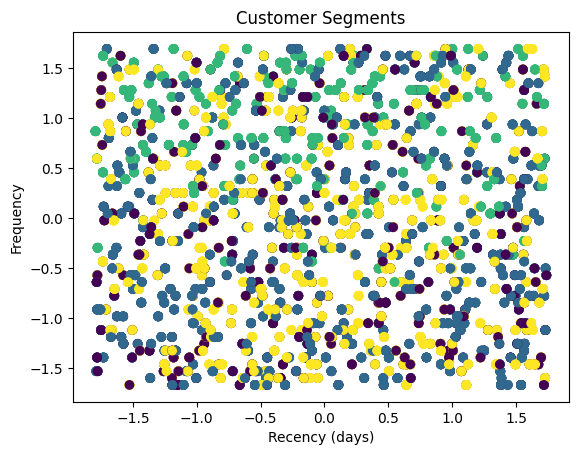

In [ ]:
plt.scatter(df['recency'], df['purchase_frequency'], c=y_means, cmap='viridis')
plt.xlabel('Recency (days)')
plt.ylabel('Frequency')
plt.title('Customer Segments')
plt.show()

In [ ]:
# DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust 'eps' and 'min_samples' as needed
labels = dbscan.fit_predict(df[numerical_cols])
df['cluster'] = labels


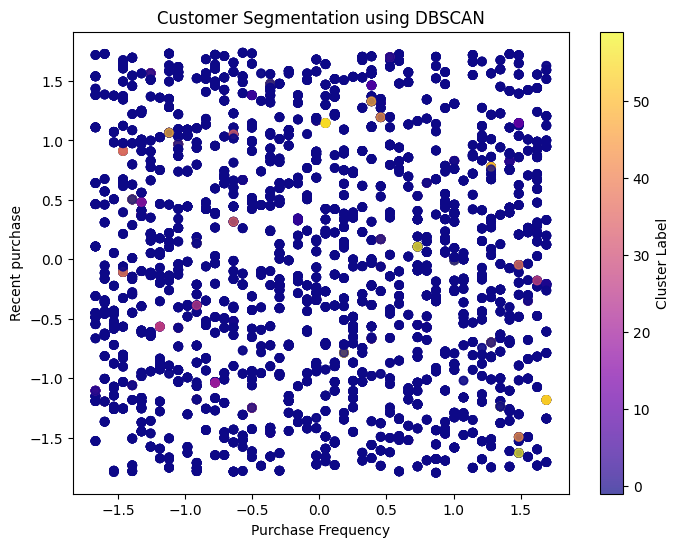

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['purchase_frequency'], df['recency'], c=df['cluster'], cmap='plasma', alpha=0.7)
plt.xlabel("Purchase Frequency")
plt.ylabel("Recent purchase")
plt.title("Customer Segmentation using DBSCAN")
plt.colorbar(label="Cluster Label")
plt.show()

In [ ]:

# Check Unique Clusters
print("Unique Clusters:", np.unique(labels))

Unique Clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46
 47 48 49 50 51 52 53 54 55 56 57 58 59]


## Step 6: Model Evaluation

In [ ]:
print("Evaluating Logistic Regression Model...")
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))

Evaluating Logistic Regression Model...
Logistic Regression Classification Report:
               precision    recall  f1-score   support

         0.0       0.53      0.65      0.58       970
         1.0       0.58      0.46      0.51      1030

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.56      0.55      0.55      2000

Logistic Regression ROC-AUC: 0.5702992693424082


In [ ]:
print("Evaluating Decision Tree Model...")
y_pred_dtc = dtc_model.predict(X_test)
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_dtc))
print("Logistic Regression ROC-AUC:", round(roc_auc_score(y_test, dtc_model.predict_proba(X_test)[:, 1])*100,4),"%")
print("Acuuracy:", round(accuracy_score(y_test,y_pred_dtc)*100,2),"%")


Evaluating Decision Tree Model...
Logistic Regression Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       970
         1.0       1.00      1.00      1.00      1030

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Logistic Regression ROC-AUC: 99.8484 %
Acuuracy: 99.85 %


In [ ]:
print("Evaluating Random Forest Model...")
y_pred_rfc = rfc_model.predict(X_test)
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_rfc))
print("Logistic Regression ROC-AUC:", round(roc_auc_score(y_test, rfc_model.predict_proba(X_test)[:, 1])*100,4),"%")
print("Acuuracy:", round(accuracy_score(y_test,y_pred_rfc)*100,2),"%")

Evaluating Random Forest Model...
Logistic Regression Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       970
         1.0       1.00      1.00      1.00      1030

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Logistic Regression ROC-AUC: 100.0 %
Acuuracy: 100.0 %


In [ ]:
print("Evaluating XGBOOST Model...")
y_pred_xgb = xgb_model.predict(X_test)
print("Logistic Regression Classification Report:\n")
print(classification_report(y_test, y_pred_xgb))
print("Logistic Regression ROC-AUC:", round(roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])*100,4),"%")
print("Acuuracy:", round(accuracy_score(y_test,y_pred_xgb)*100,2),"%")

Evaluating XGBOOST Model...
Logistic Regression Classification Report:

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       970
         1.0       1.00      1.00      1.00      1030

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Logistic Regression ROC-AUC: 100.0 %
Acuuracy: 100.0 %


## Step 7: Save Model

In [145]:
print("Saving the model...")
with open('churn_prediction_xgb_model.pkl', 'wb') as model_file:
    pickle.dump(xgb_model, model_file)
print("Model saved successfully!")

Saving the model...
Model saved successfully!
